In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA
# Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
# Auto Arima Model Choosing
import pmdarima as pm
# Decompose Seaonal 
from statsmodels. tsa.seasonal import seasonal_decompose
# SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
donor = pd.read_csv("E:/MSBA2020/springmini3/BAN 6090 Practicum/Donor/Donor Report - Jan 2020.csv")


In [2]:
# Drop the first row because it only sum up gift amount
donor = donor.drop([0])

In [3]:
donor

,A- Unique Donor ID,B-Gift Date,C-Gift Fiscal Year,D-Gift Amount,E-Donor's Last Name,F-Donor's First Name,G-Org Name,Household Name,H-Donor's ZIP Code,I-Source of Donation,J-Method of Donation,K-Purpose of Donation,JJ-Tender Type,Source
1,1.0,4/1/2008,General,$50.00,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls,Ticket,WEB,Empty Bowls
2,1.0,12/21/2012,Annual Campaign 13,$250.00,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Direct Mail 13,Direct Mail,CHECK,Empty Bowls
3,1.0,12/21/2012,Annual Campaign 13,$20.00,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Holiday Cards 13,Holiday Card,CHECK,Empty Bowls
4,1.0,4/8/2013,Annual Campaign 13,$50.00,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 13,EB Tix,WEB,Empty Bowls
5,1.0,5/3/2016,Annual Campaign 16,$60.00,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 16,EB Tix,EVENT BRITE,Empty Bowls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169295,95133.0,12/31/2019,Annual Campaign SHFB 20,$25.00,Gill,Hugh,Hugh Allen Gill,NaN,27406-9157,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169296,95134.0,12/31/2019,Annual Campaign SHFB 20,$15.00,Updike,Wayne,Wayne M Updike,NaN,28117-9693,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169297,95135.0,12/31/2019,Annual Campaign SHFB 20,$25.00,Galloway,Wanda,Wanda Galloway,NaN,27320-9235,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169298,95136.0,12/31/2019,Annual Campaign SHFB 20,"$5,000.00",Ramsay,David,David Ramsay IV,"David and Laura Ramsay, IV",27106-9834,Individual,Major 20,Major,CHECK,Feeding America


In [4]:
# Check is there any missing value in every column
donor.isnull().any()

A- Unique Donor ID       False
B-Gift Date              False
C-Gift Fiscal Year        True
D-Gift Amount            False
E-Donor's Last Name       True
F-Donor's First Name      True
G-Org Name               False
Household Name            True
H-Donor's ZIP Code        True
I-Source of Donation      True
J-Method of Donation     False
K-Purpose of Donation     True
JJ-Tender Type            True
Source                    True
dtype: bool

In [5]:
print(donor.dtypes)

A- Unique Donor ID       float64
B-Gift Date               object
C-Gift Fiscal Year        object
D-Gift Amount             object
E-Donor's Last Name       object
F-Donor's First Name      object
G-Org Name                object
Household Name            object
H-Donor's ZIP Code        object
I-Source of Donation      object
J-Method of Donation      object
K-Purpose of Donation     object
JJ-Tender Type            object
Source                    object
dtype: object


In [6]:
donor["D-Gift Amount"]=donor["D-Gift Amount"].str.replace("$","").str.replace(",","")
donor["D-Gift Amount"]=pd.to_numeric(donor["D-Gift Amount"])

In [7]:
print(donor["D-Gift Amount"])

1           50.0
2          250.0
3           20.0
4           50.0
5           60.0
           ...  
169295      25.0
169296      15.0
169297      25.0
169298    5000.0
169299      25.0
Name: D-Gift Amount, Length: 169299, dtype: float64


In [8]:
donor.shape

(169299, 14)

In [9]:
# Function to see the missing value percentages
def NAPercent(df):
    NOD1=plt.figure()
    colNames=df.columns
    NAPERCENT = pd.DataFrame(columns=['Column_Name','NAPercentage'])
    for i in range(0,len(df.columns)):
        NAP=df.iloc[:,i].isnull().sum()/len(df)*100 
        NAPERCENT=NAPERCENT.append(pd.DataFrame({'Column_Name':[colNames[i]],'NAPercentage':[NAP]}),ignore_index=True)   
    print(round(NAPERCENT,2))
    NAP=NAPERCENT.plot(kind='bar',x='Column_Name',y='NAPercentage')
    NAP.axhline(y=50,color='black')
    NOD1.savefig("MissingValue.pdf", bbox_inches='tight')

              Column_Name  NAPercentage
0      A- Unique Donor ID          0.00
1             B-Gift Date          0.00
2      C-Gift Fiscal Year          0.00
3           D-Gift Amount          0.00
4     E-Donor's Last Name          3.68
5    F-Donor's First Name          3.63
6              G-Org Name          0.00
7          Household Name         60.84
8      H-Donor's ZIP Code          2.08
9    I-Source of Donation          1.87
10   J-Method of Donation          0.00
11  K-Purpose of Donation          0.00
12         JJ-Tender Type          0.02
13                 Source         51.85


<Figure size 432x288 with 0 Axes>

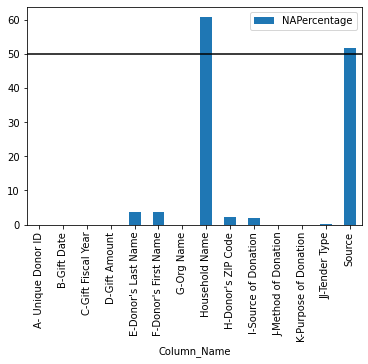

In [10]:

NAPercent(donor)

In [11]:
donor

,A- Unique Donor ID,B-Gift Date,C-Gift Fiscal Year,D-Gift Amount,E-Donor's Last Name,F-Donor's First Name,G-Org Name,Household Name,H-Donor's ZIP Code,I-Source of Donation,J-Method of Donation,K-Purpose of Donation,JJ-Tender Type,Source
1,1.0,4/1/2008,General,50.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls,Ticket,WEB,Empty Bowls
2,1.0,12/21/2012,Annual Campaign 13,250.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Direct Mail 13,Direct Mail,CHECK,Empty Bowls
3,1.0,12/21/2012,Annual Campaign 13,20.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Holiday Cards 13,Holiday Card,CHECK,Empty Bowls
4,1.0,4/8/2013,Annual Campaign 13,50.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 13,EB Tix,WEB,Empty Bowls
5,1.0,5/3/2016,Annual Campaign 16,60.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 16,EB Tix,EVENT BRITE,Empty Bowls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169295,95133.0,12/31/2019,Annual Campaign SHFB 20,25.0,Gill,Hugh,Hugh Allen Gill,NaN,27406-9157,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169296,95134.0,12/31/2019,Annual Campaign SHFB 20,15.0,Updike,Wayne,Wayne M Updike,NaN,28117-9693,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169297,95135.0,12/31/2019,Annual Campaign SHFB 20,25.0,Galloway,Wanda,Wanda Galloway,NaN,27320-9235,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169298,95136.0,12/31/2019,Annual Campaign SHFB 20,5000.0,Ramsay,David,David Ramsay IV,"David and Laura Ramsay, IV",27106-9834,Individual,Major 20,Major,CHECK,Feeding America


In [12]:
# Make the Column name in a edit friendly format
donor.columns = donor.columns.str.lower().str.replace('\'', '').str.replace('-','')

In [13]:
# Change the column names
donor=donor.rename(columns={'a unique donor id': 'donorID','bgift date':'gift_date','cgift fiscal year':'gift_fiscal_year','dgift amount':'gift_amount',
                     'edonors last name':'last_name','fdonors first name':'first_name','gorg name':'organization_name','hdonors zip code':'donors_zip_code',
                     'isource of donation':'source_of_donation','jmethod of donation':'donation_method','kpurpose of donation':'purpose_of_donation','jjtender type':'tender_type',
                     'household name':'household_name'})

In [14]:
donor

,donorID,gift_date,gift_fiscal_year,gift_amount,last_name,first_name,organization_name,household_name,donors_zip_code,source_of_donation,donation_method,purpose_of_donation,tender_type,source
1,1.0,4/1/2008,General,50.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls,Ticket,WEB,Empty Bowls
2,1.0,12/21/2012,Annual Campaign 13,250.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Direct Mail 13,Direct Mail,CHECK,Empty Bowls
3,1.0,12/21/2012,Annual Campaign 13,20.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Holiday Cards 13,Holiday Card,CHECK,Empty Bowls
4,1.0,4/8/2013,Annual Campaign 13,50.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 13,EB Tix,WEB,Empty Bowls
5,1.0,5/3/2016,Annual Campaign 16,60.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 16,EB Tix,EVENT BRITE,Empty Bowls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169295,95133.0,12/31/2019,Annual Campaign SHFB 20,25.0,Gill,Hugh,Hugh Allen Gill,NaN,27406-9157,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169296,95134.0,12/31/2019,Annual Campaign SHFB 20,15.0,Updike,Wayne,Wayne M Updike,NaN,28117-9693,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169297,95135.0,12/31/2019,Annual Campaign SHFB 20,25.0,Galloway,Wanda,Wanda Galloway,NaN,27320-9235,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169298,95136.0,12/31/2019,Annual Campaign SHFB 20,5000.0,Ramsay,David,David Ramsay IV,"David and Laura Ramsay, IV",27106-9834,Individual,Major 20,Major,CHECK,Feeding America


In [15]:
donor['donorID'] = donor.astype(object)

In [16]:
#Check the data type of the donor dataframe
print(donor.dtypes)

donorID                 object
gift_date               object
gift_fiscal_year        object
gift_amount            float64
last_name               object
first_name              object
organization_name       object
household_name          object
donors_zip_code         object
source_of_donation      object
donation_method         object
purpose_of_donation     object
tender_type             object
source                  object
dtype: object


In [17]:
len(donor["donors_zip_code"].unique().tolist())

30436

In [18]:
donor

,donorID,gift_date,gift_fiscal_year,gift_amount,last_name,first_name,organization_name,household_name,donors_zip_code,source_of_donation,donation_method,purpose_of_donation,tender_type,source
1,1,4/1/2008,General,50.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls,Ticket,WEB,Empty Bowls
2,1,12/21/2012,Annual Campaign 13,250.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Direct Mail 13,Direct Mail,CHECK,Empty Bowls
3,1,12/21/2012,Annual Campaign 13,20.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Holiday Cards 13,Holiday Card,CHECK,Empty Bowls
4,1,4/8/2013,Annual Campaign 13,50.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 13,EB Tix,WEB,Empty Bowls
5,1,5/3/2016,Annual Campaign 16,60.0,Nifong,Jeff,Jeff D Nifong,Jeff D. and Joanna K. Nifong,27265-9501,Individual,Empty Bowls 16,EB Tix,EVENT BRITE,Empty Bowls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169295,95133,12/31/2019,Annual Campaign SHFB 20,25.0,Gill,Hugh,Hugh Allen Gill,NaN,27406-9157,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169296,95134,12/31/2019,Annual Campaign SHFB 20,15.0,Updike,Wayne,Wayne M Updike,NaN,28117-9693,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169297,95135,12/31/2019,Annual Campaign SHFB 20,25.0,Galloway,Wanda,Wanda Galloway,NaN,27320-9235,Individual,Direct Mail 20,OtoO New Holiday,CHECK,Feeding America
169298,95136,12/31/2019,Annual Campaign SHFB 20,5000.0,Ramsay,David,David Ramsay IV,"David and Laura Ramsay, IV",27106-9834,Individual,Major 20,Major,CHECK,Feeding America


In [19]:
donorts=donor[['gift_date','gift_amount']]

In [20]:
donorts

,gift_date,gift_amount
1,4/1/2008,50.0
2,12/21/2012,250.0
3,12/21/2012,20.0
4,4/8/2013,50.0
5,5/3/2016,60.0
...,...,...
169295,12/31/2019,25.0
169296,12/31/2019,15.0
169297,12/31/2019,25.0
169298,12/31/2019,5000.0


In [21]:
# Convert gift_date from object datatype into datetime data type
donorts['gift_date'] = pd.to_datetime(donorts['gift_date'])



<ipython-input-21-bb2bf5760cf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donorts['gift_date'] = pd.to_datetime(donorts['gift_date'])


In [22]:
donorts = donorts.set_index('gift_date')

In [23]:
donorts.head()

,gift_amount
gift_date,
2008-04-01,50.0
2012-12-21,250.0
2012-12-21,20.0
2013-04-08,50.0
2016-05-03,60.0


In [24]:
#Aggregate donation to sum of per month
dntsm=donorts.resample('M').sum()

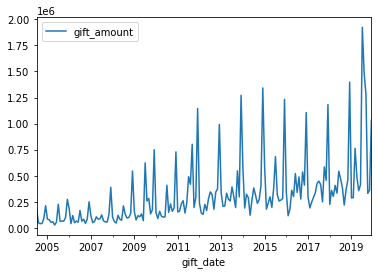

In [25]:
#Plot the time series
dntsm.plot()
plt.show()

In [26]:
# Base on the Dickey-Fuller Test result, this time series is not stationary time series. Before fit ARIMA model, we need to take the first difference to make it a stationary time series.
res=adfuller(dntsm['gift_amount'])
print("The p-value for the ADF test is ", res[1])

The p-value for the ADF test is  0.9877549598522867


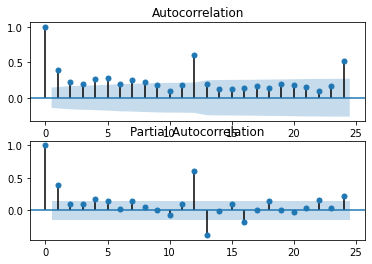

In [27]:
# Plot the ACF and PACF on the same page for the original series
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(dntsm, lags=24, ax=axes[0])

# Plot the PACF
plot_pacf(dntsm, lags=24, ax=axes[1])
plt.show()

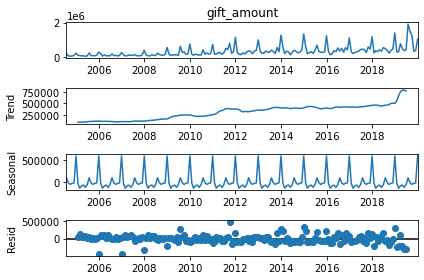

In [28]:
# Base on the ACF, the time series has a seasonal part
decomp = seasonal_decompose(dntsm['gift_amount'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

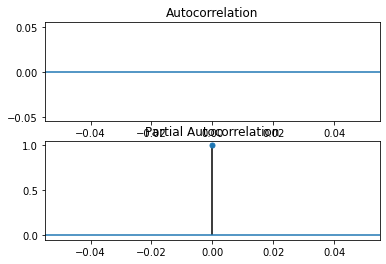

In [29]:
# Because the series shows a seaonal component, lets take the difference of seasonal component at period =12 and plot the seasonal ACF and PACF
# to determine the seasonal compoment P,D,Q,S.
dnseas=dntsm.diff(12)
# Create Figure
fig,axes=plt.subplots(2,1)
# Plot seasonal ACF
plot_acf(dnseas['gift_amount'],ax=axes[0])

# Plot seasonal PACF
plot_pacf(dnseas['gift_amount'],ax=axes[1])

plt.show()

            gift_amount
gift_date              
2004-07-31          NaN
2004-08-31   -138237.03
2004-09-30     -9406.59
2004-10-31      1467.21
2004-11-30     48128.31
...                 ...
2019-08-31   -437455.00
2019-09-30   -204925.73
2019-10-31   -947003.50
2019-11-30     30448.64
2019-12-31    669547.02

[186 rows x 1 columns]


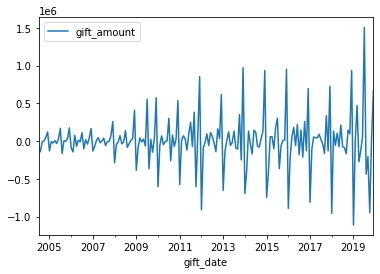

The p-value fof the ADF test is  8.090650501377911e-08


In [30]:
# Take the first difference of the time series
dntsmd=dntsm.diff()
print(dntsmd)
#Check the stationarity of first difference series
dntsmd.plot()
plt.show()
# Drop the NaN value in the first row produced by the first difference
dntsmd=dntsmd.dropna()
resfd=adfuller(dntsmd['gift_amount'])
print('The p-value fof the ADF test is ', resfd[1])

# Base on the ADF result, after the first difference the time series is a stationary time series.
# We can start to fit an ARIMA model and make prediction

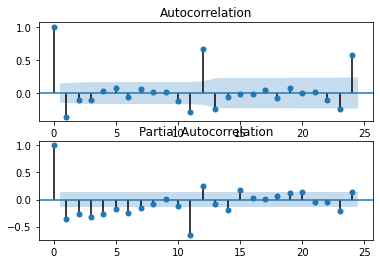

In [31]:
# For fitting the correct ARIMA model to this dataset, we need to take a look at the ACF and PACF first
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(dntsmd, lags=24, ax=axes[0])

# Plot the PACF
plot_pacf(dntsmd, lags=24, ax=axes[1])
plt.show()

# Both of ACF and PACF slowly decay. ACF is not significant after lag 3 and have a spike at lag 12 and lag 24. PACF slowly decay and have
# a negative spike at lag 11.

In [32]:
model1 = pm.auto_arima(dntsm,
                      seasonal=True,m=12,start_p=0,start_q=0,max_p=3, max_q=3,
                      d=1,start_P=0,start_Q=0,max_P=3,max_Q=3,D=1,
                      information_criterion='aic',
                      trace=True,
                      trend='c',
                      error_action='ignore',
                      suppress_warnings=True)
                       
# Print model summary
print(model1.summary())


Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=4758.195, BIC=4764.502, Time=0.050 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=4730.965, BIC=4743.578, Time=0.356 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=4715.915, BIC=4728.529, Time=0.408 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=4758.195, BIC=4764.502, Time=0.022 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=4726.571, BIC=4736.031, Time=0.057 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=4717.862, BIC=4733.629, Time=0.536 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 2, 12) (constant=True); AIC=4717.883, BIC=4733.649, Time=1.724 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=4718.207, BIC=4730.820, Time=0.267 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 2, 12) (constant=True); AIC=4716.513, BIC=4735.432, Time=3.597 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 1, 12) (constant=True); AIC=4744.416,

In [33]:
import joblib
# Set model name
filename = "donor_model1.pkl"

# Pickle it
joblib.dump(model1, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model when you have new data and want to use this model to predict the future dononation
#loaded_model.update(df_new)

In [34]:
# Create model object
model = SARIMAX(dntsm, 
                order=(3, 1, 1),  
                seasonal_order=(0, 1, 1, 12))
# Fit model
result = model.fit()

In [35]:
# Create forecast object
forecast_object = result.get_forecast(steps=48)

# Extract prediction mean
mean= forecast_object.predicted_mean.to_frame('Predicted_Donation').rename_axis('gift_time')

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates, for plotting
month = mean.index

mean

,Predicted_Donation
gift_time,
2020-01-31,4.530861e+05
2020-02-29,5.454763e+05
2020-03-31,8.827826e+05
2020-04-30,7.274210e+05
2020-05-31,5.944561e+05
2020-06-30,6.633556e+05
2020-07-31,1.378922e+06
2020-08-31,1.145718e+06
2020-09-30,9.821457e+05


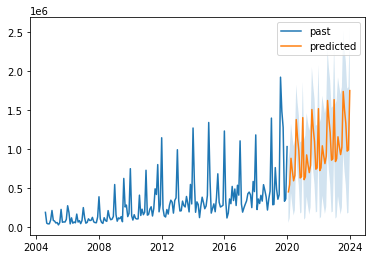

            Predicted_Donation
gift_time                     
2020-01-31        4.530861e+05
2020-02-29        5.454763e+05
2020-03-31        8.827826e+05
2020-04-30        7.274210e+05
2020-05-31        5.944561e+05
2020-06-30        6.633556e+05
2020-07-31        1.378922e+06
2020-08-31        1.145718e+06
2020-09-30        9.821457e+05
2020-10-31        6.309007e+05
2020-11-30        6.457631e+05
2020-12-31        1.403783e+06
2021-01-31        6.094018e+05
2021-02-28        6.446439e+05
2021-03-31        9.264349e+05
2021-04-30        8.085621e+05
2021-05-31        6.992888e+05
2021-06-30        7.930435e+05
2021-07-31        1.507673e+06
2021-08-31        1.269318e+06
2021-09-30        1.097324e+06
2021-10-31        7.433811e+05
2021-11-30        7.582680e+05
2021-12-31        1.518413e+06
2022-01-31        7.254289e+05
2022-02-28        7.612349e+05
2022-03-31        1.042713e+06
2022-04-30        9.243985e+05
2022-05-31        8.148144e+05
2022-06-30        9.085293e+05
2022-07-

In [36]:
plt.figure()

# Plot past CO2 levels
plt.plot(dntsm.index, dntsm, label='past')

# Plot the prediction means as line
plt.plot(month, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(month, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()


# Print all predicted mean
print(mean.iloc[0:])

# Print all confidence interval
print(conf_int.iloc[0:])


In [37]:
# Donor Number times series analysis
dnnumber=donor[['donorID','gift_date']]

In [38]:
dnnumber['gift_date']=pd.to_datetime(dnnumber['gift_date'])
print(dnnumber)

       donorID  gift_date
1            1 2008-04-01
2            1 2012-12-21
3            1 2012-12-21
4            1 2013-04-08
5            1 2016-05-03
...        ...        ...
169295   95133 2019-12-31
169296   95134 2019-12-31
169297   95135 2019-12-31
169298   95136 2019-12-31
169299   95139 2019-12-31

[169299 rows x 2 columns]


<ipython-input-38-41d6580a192a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnnumber['gift_date']=pd.to_datetime(dnnumber['gift_date'])


In [39]:
dnnumber=dnnumber.set_index('gift_date')

In [40]:
dnnumber['donorID']=dnnumber.astype(object)

In [41]:
print(dnnumber.dtypes)

donorID    object
dtype: object


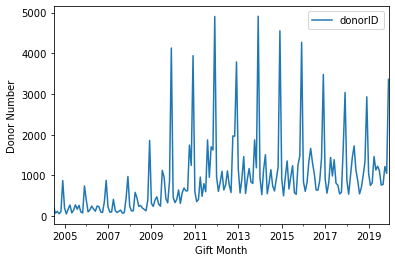

,donorID
gift_date,
2004-07-01,209
2004-08-01,72
2004-09-01,117
2004-10-01,59
2004-11-01,108
...,...
2019-08-01,761
2019-09-01,779
2019-10-01,1218


In [42]:
dnnumberu=dnnumber.resample('MS').agg('count')

dnnumberu.plot()
# naming the x axis 
plt.xlabel('Gift Month') 
# naming the y axis 
plt.ylabel('Donor Number') 

plt.show()

dnnumberu

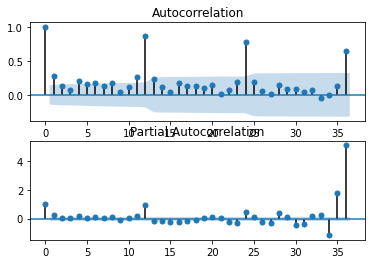

In [43]:
# Plot the ACF and PACF on the same page for the original series
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(dnnumberu, lags=36,ax=axes[0])

# Plot the PACF
plot_pacf(dnnumberu,lags=36,ax=axes[1])
plt.show()

# Base on the plot, we can see the time series has a strong seasonal pattern.

In [44]:
dnnumberdf=dnnumberu.diff(12)

In [45]:
dnnumberdf=dnnumberdf.dropna()
dnnumberdf

,donorID
gift_date,
2005-07-01,68.0
2005-08-01,98.0
2005-09-01,147.0
2005-10-01,42.0
2005-11-01,-30.0
...,...
2019-08-01,215.0
2019-09-01,79.0
2019-10-01,224.0


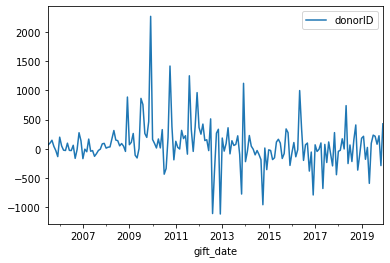

In [46]:
# Seasonal Difference Plot
dnnumberdf.plot()
plt.show()

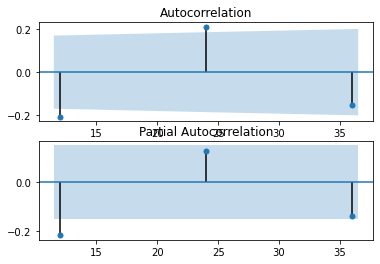

In [47]:
# Plot the ACF and PACF 
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(dnnumberdf, lags=[12,24,36],ax=axes[0])

# Plot the PACF
plot_pacf(dnnumberdf,lags=[12,24,36],ax=axes[1])
plt.show()

# Base on the plot, we can see the time series has a strong seasonal pattern.

In [48]:
# Base on the Dickey-Fuller Test result, this time series is not stationary time series at significance level 95%. Before fit ARIMA model, we still need to take the first difference to make it a stationary time series.
res=adfuller(dnnumberdf['donorID'])
print("The p-value for the ADF test is ", res[1])
print(res)

The p-value for the ADF test is  0.05546857838192918
(-2.8200337751924467, 0.05546857838192918, 11, 162, {'1%': -3.471374345647024, '5%': -2.8795521079291966, '10%': -2.5763733302850174}, 2345.8602986818664)


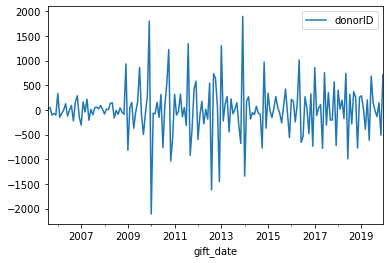

In [49]:
dndf=dnnumberdf.diff()
dndf=dndf.dropna()
dndf.plot()
plt.show()

In [50]:
# Run Dickey-Fuller Test again, this time series is not stationary time series at significance level 95%. Before fit ARIMA model, we need to take the first difference to make it a stationary time series.
res=adfuller(dndf['donorID'])
print("The p-value for the ADF test is ", res[1])

The p-value for the ADF test is  7.392615444629267e-07


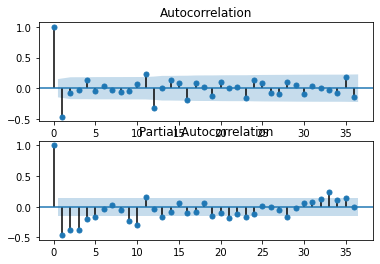

In [51]:
# Plot the ACF and PACF on the same page for the original series
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(dndf, lags=36,ax=axes[0])

# Plot the PACF
plot_pacf(dndf,lags=36,ax=axes[1])
plt.show()

# Base on the plot, we can see the time series has a strong seasonal pattern.

In [52]:
model2 = pm.auto_arima(dnnumberu,
                      seasonal=True,m=12,start_p=0,start_q=0,max_p=2, max_q=2,
                      d=1,start_P=0,start_Q=0,max_P=2,max_Q=2,D=1,
                      information_criterion='aic',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
                       
# Print mode2 summary
print(model2.summary())


Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=2658.420, BIC=2664.726, Time=0.034 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=2595.755, BIC=2608.369, Time=1.131 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=2542.574, BIC=2555.187, Time=1.385 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=2656.424, BIC=2659.578, Time=0.032 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=2552.226, BIC=2561.686, Time=0.233 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=2539.063, BIC=2554.830, Time=3.138 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=2539.606, BIC=2552.219, Time=1.094 seconds
Fit ARIMA: (0, 1, 1)x(2, 1, 1, 12) (constant=True); AIC=2540.871, BIC=2559.791, Time=6.933 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 2, 12) (constant=True); AIC=2540.615, BIC=2559.535, Time=7.915 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 2, 12) (constant=True); AIC=2541.989,

In [53]:
# Set model name
dnn = "donor_number.pkl"

# Pickle it
joblib.dump(model2, dnn)

# Load the model back in
loaded_model2 = joblib.load(dnn)

# Update the model when you have new data and want to use this model to predict the future dononation
#loaded_model.update(df_new)


In [54]:
dnnumberu

,donorID
gift_date,
2004-07-01,209
2004-08-01,72
2004-09-01,117
2004-10-01,59
2004-11-01,108
...,...
2019-08-01,761
2019-09-01,779
2019-10-01,1218


In [55]:
# Create model object
model_dn = SARIMAX(dnnumberu, 
                order=(0, 1, 1),  
                seasonal_order=(1, 1, 1, 12))
# Fit model
result_dn = model_dn.fit()

In [56]:
# Create forecast object
forecast_object_dn= result_dn.get_forecast(steps=48)

# Extract prediction mean
mean_dn= forecast_object_dn.predicted_mean.to_frame('Predicted_Donor_Number').rename_axis('gift_time')

# Extract the confidence intervals
conf_int_dn = forecast_object_dn.conf_int()

# Extract the forecast dates, for plotting
month_dn = mean_dn.index

print(mean_dn)

print(dnnumberu)

            Predicted_Donor_Number
gift_time                         
2020-01-01             1047.087997
2020-02-01              743.729328
2020-03-01              923.104448
2020-04-01             1499.119019
2020-05-01             1427.771539
2020-06-01             1226.266350
2020-07-01             1103.809259
2020-08-01              729.229897
2020-09-01              821.491725
2020-10-01             1244.935634
2020-11-01             1126.335449
2020-12-01             3291.169586
2021-01-01             1112.887032
2021-02-01              810.349208
2021-03-01              920.020068
2021-04-01             1538.316567
2021-05-01             1311.307466
2021-06-01             1287.728560
2021-07-01             1167.360082
2021-08-01              809.442882
2021-09-01              856.839182
2021-10-01             1289.681354
2021-11-01             1141.236108
2021-12-01             3393.772681
2022-01-01             1134.153300
2022-02-01              831.119560
2022-03-01          

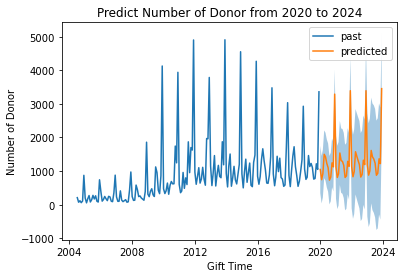

In [57]:
NOD=plt.figure()
# Nmae the x axis
plt.xlabel('Gift Time') 
# Name the y axis 
plt.ylabel('Number of Donor')
# Give the plot a title
plt.title('Predict Number of Donor from 2020 to 2024')

# Plot past number of donor
plt.plot(dnnumberu.index, dnnumberu, label='past')

# Plot the prediction means as line
plt.plot(month_dn, mean_dn, label='predicted')

# Shade between the confidence intervals
plt.fill_between(month_dn, conf_int_dn.iloc[:,0], conf_int_dn.iloc[:,1], alpha=0.4)

# Plot legend and show figure
plt.legend()
plt.show()


# Print all predicted mean
#print(mean2.iloc[0:])

# Print all confidence interval
#print(conf_int2.iloc[0:])

In [58]:
NOD.savefig("NumberofDonor.pdf", bbox_inches='tight')